<a href="https://colab.research.google.com/github/BooMaria/AStar_Implementation_Robotics/blob/main/C%C3%B2pia_de_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librays used 

In [91]:
import sys
import datetime


# A* algorithm

declaration of the class TreeNode


Used to solve the maze

In [92]:

class TreeNode(object):
    def __init__(self, id_, x,y,end = False,dad= None):
        self.id = id_
        self.children = []
        self.g = -1
        self.h = -1
        self.f = 0
        self.x = x
        self.y = y
        self.dad = None
        self.path = []
        self.end = end
    
    def __repr__(self):
        return "[%s]" % self.id
    
    def add_child(self, node):
        node.add_dad(self)
        self.children.append(node)


    def add_path(self):
        self.path = self.dad.path[:]
        self.path.append(self)
    
    def add_dad(self, node):
        self.dad = node

    def get_dad(self):
        return self.dad
    
    def get_children(self):
        return self.children
    
    def get_rev_children(self):
        children = self.children[:]
        children.reverse()
        return children

    def get_h(self ):
        return self.h
        
    def set_h(self, h):
        self.h = h

    def get_g(self): 
        return self.g

    def set_g(self, g):
        self.g = g

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    
    def get_end(self):
      return self.end




# First tree 3*3 as an example

In [93]:
def get_tree1():
    
    #create node
    root = TreeNode("a3",1,3,0)
    root.path.append(root) 
    b3 = TreeNode("b3",2,3,0) 
    c3 = TreeNode("c3",3,3,0) 
    c2 = TreeNode("a2",1,2,0) 
    b2 = TreeNode("b2",2,2,0) 
    a2 = TreeNode("c2",3,2,0) 
    a1 = TreeNode("a1",1,1,1) 
    b1 = TreeNode("b1",2,1,0) 
    c1 = TreeNode("c1",3,1,0)
    
    
    #add nodes
    root.add_child(b3) 
    b3.add_child(c3) 
    b3.add_child(b2) 
    b3.add_path() 

    c3.add_child(c2) 
    c3.add_path() 

    c2.add_child(c1) 
    c2.add_path() 
    c1.add_path()
    ###----
    b2.add_child(a2) 
    b2.add_path() 

    a2.add_child(a1) 
    a2.add_path()

    a1.add_child(b1) 
    a1.add_path() 
    b1.add_path()
    ##----
    
    return root

def get_tree2():
    # create node
    root = TreeNode("d2", 4, 2)
    d1 = TreeNode("d1", 4, 1)
    d3 = TreeNode("d3", 4, 3)
    d4 = TreeNode("d4", 4, 4)
    c4 = TreeNode("c4", 3, 4)
    b4 = TreeNode("b4", 2, 4)
    a4 = TreeNode("a4", 1, 4)
    a3 = TreeNode("a3", 1, 3)
    b3 = TreeNode("b3", 2, 3)
    c3 = TreeNode("c3", 3, 3)
    c2 = TreeNode("c2", 3, 2)
    c1 = TreeNode("c1", 3, 1)
    b2 = TreeNode("b2", 2, 2)
    b1 = TreeNode("b1", 2, 1)
    a2 = TreeNode("a2", 1, 2)
    a1 = TreeNode("a1", 1, 1)

    # add nodes
    root.path.append(root)
    root.add_child(d1)
    root.add_child(d3)

    d1.add_path()

    d3.add_child(d4)

    d3.add_path()

    d4.add_child(c4)

    d4.add_path()

    c4.add_child(b4)

    c4.add_path()

    b4.add_child(a4)

    b4.add_child(b3)

    b4.add_path()

    a4.add_child(a3)

    a4.add_path()

    a3.add_path()

    b3.add_child(c3)

    b3.add_path()

    c3.add_child(c2)

    c3.add_path()

    c2.add_child(b2)

    c2.add_child(c1)

    c2.add_path()

    c1.add_path()

    b2.add_child(b1)

    b2.add_child(a2)

    b2.add_path()

    b1.add_path()

    a2.add_child(a1)

    a2.add_path()

    a1.add_path()

    return root

# Implemented tree 4*4
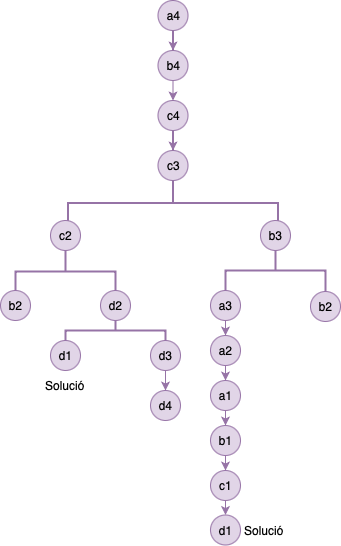

In [94]:
# Test trees

def get_tree():
    
    root = TreeNode("a4", 0, 0)
    root.path.append(root)

    a1 = TreeNode("a3", 1, 0)
    a2 = TreeNode("a2", 2, 0)
    a3 = TreeNode("a1", 3, 0)
    
    b4 = TreeNode("b4", 0, 1)
    b3 = TreeNode("b3", 1, 1)
    b2 = TreeNode("b2", 2, 1)
    b1 = TreeNode("b1", 3, 1)

    
    c4 = TreeNode("c4", 0, 2)
    c3 = TreeNode("c3", 1, 2)
    c2 = TreeNode("c2", 2, 2)
    c1 = TreeNode("c1", 3, 2)
    
    d4 = TreeNode("d4", 0, 3)
    d3 = TreeNode("d3", 1, 3)
    d2 = TreeNode("d2", 2, 3)
    d1 = TreeNode("d1", 3, 3)
    
    #add nodes
    root.add_child(b4)
    #root.path.append(root)
    b4.add_child(c4)
    b4.add_path()
    c4.add_child(c3)
    c4.add_path()
    c3.add_child(b3)
    c3.add_child(c2)
    c3.add_path()
    ########## fills c2 i b3
    b3.add_child(a3)
    b3.add_child(b2)
    b3.add_path()
    ###########
    a3.add_child(a2)
    a3.add_path()
    #########
    a2.add_child(a1)
    a2.add_path() 
    #########
    a1.add_child(b1)
    a1.add_path()
    #########
    b1.add_child(c1)
    b1.add_path()
    #########
    c1.add_child(d1)
    c1.add_path()
    d1.add_path() 
    d1.add_path
  
    c2.add_child(b2)
    c2.add_child(d2)
    c2.add_path()
    
    b2.add_path()
   
    
    d2.add_child(d3)
    d2.add_child(d1)
    d2.add_path()
    d1.add_path
  
    d1.add_path()
  
    d3.add_child(d4)
    d3.add_path()
    d4.add_path()
    
    return root 


# Sort of the list


In [95]:

# Find g and update with new value
def find_g (list_tre):
    for pepe in list_tre:
        if pepe.get_g() == -1:
            pepe.set_g(len(pepe.path) - 1)
            #print("g:",pepe.get_g())

#find h acording to end_node and update with new value
def find_h (list_tre):
    for pepe in list_tre:
        if pepe.get_h() == -1:
            #pepe.set_h(abs(end_node.get_x() - pepe.get_x()) + abs(end_node.get_y()  pepe.get_y()))
            pepe.set_h(abs(end_node.get_x() - pepe.get_x()) + abs(end_node.get_y() + pepe.get_y()))

            #print("h:",pepe.get_h())


# Implementation of the algorithm A*

In [96]:
#A* algorithm
def A(root,end_node):
    list_tre = [root]
    
    while True:
      find_g(list_tre)
      find_h(list_tre)

      #Sort the list with the heuristic of f= g + h ,Manhattan Distance
      #list_tre = order_node_list(list_tre)

      #print("x:",list_tre[0].get_x(),"y:",list_tre[0].get_y())
      #print(" Found:",list_tre[0].path)
      #If end = actual node
      if (list_tre[0].get_x() == end_node.get_x() and list_tre[0].get_y() == end_node.get_y() ):
            print("Best Solution Found:",list_tre[0].path)
            return True
      #If there are no more tree to search and didin't found the end
      elif len(list_tre[0].get_children()) == 0:
            list_tre.pop(0)
            if len(list_tre) == 0:
                print("No solution found :(")
                return False
      # Get the children of the actual node and repeat
      else:
            #get first element
            pepe = list_tre.pop(0)
            #print("child:", pepe.get_children())
            for child in pepe.get_children():
                #if there is not any element stored in the list
                if len(list_tre) == 0:
                    list_tre.append(child)
                    continue
                
                #add elements sorted, search for the position 
                #where list[i-1].heuristic < child.heuristic < list[i+1].heuristic
                for i in range(0, len(list_tre)):
                    #if current child is the worst heuristic in the list
                    if len(list_tre) == i:
                        list_tre.append(child)
                        break
                    #heuristic of f= g + h ,Manhattan Distance
                    if child.g + child.h < list_tre[i].g + list_tre[i].h:
                        list_tre.insert(i, child)
                        break
                list_tre.append(child)
                #print("abans:",list_tre)
                child.add_path()
            #print("despres pop",list_tre)

# Main

In [97]:
# The main
if __name__ == "__main__":
    
    end_node = TreeNode("a1", 1, 1)
    end_node1 = TreeNode("b1", 2, 1)
    root1= get_tree2()
    #the tree 4*4
    root = get_tree()
    #print(root.path)
    start = datetime.datetime.now()
    solution = A(root,end_node)
    solution1 = A(root1,end_node)
    solution2 = A(root1,end_node1)
    
    print("\n------------------------- A* -------------------------\n")
    done = datetime.datetime.now()
    elapsed = done - start
    print ("\nFinished in", elapsed.microseconds, "microseconds")
    

Best Solution Found: [[a4], [b4]]
No solution found :(
Best Solution Found: [[d2], [d3], [d4], [c4], [b4], [b3], [c3], [c2], [b2], [b1]]

------------------------- A* -------------------------


Finished in 635 microseconds


The best solution path is --> [[a0], [a1], [a2], [a3], [b3], [c3], [d3], [d2]]